<a href="https://colab.research.google.com/github/RMigliolo/Challengue-Telecom-X-Part-II/blob/main/TelecomX_LATAM_Part2_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar el archivo CSV que contiene los datos tratados anteriormente**

Carga el archivo CSV que contiene los datos tratados anteriormente.

**Importante**: Utilizar el mismo archivo que se limpió y organizó en la Part 1 del desafío Telecom X. Debe contener solo las columnas relevantes, con los datos corregidos y estandarizados.

In [8]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

In [9]:
URL = 'https://raw.githubusercontent.com/RMigliolo/Challengue-Telecom-X-Part-II/refs/heads/main/datos_churn_filtrados.csv'

datos = pd.read_csv(URL)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Cuentas_Diarias,tenure_interval,TotalPayed,TotalPayed_interval
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,0,1,1,1,65.60,593.30,2.186667,"(6, 12]",590.40,"(500, 1000]"
1,0003-MKNFE,0,1,0,0,0,9,1,1,0,...,1,0,0,1,59.90,542.40,1.996667,"(6, 12]",539.10,"(500, 1000]"
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,...,0,0,1,0,73.90,280.85,2.463333,"(0, 6]",295.60,"(0, 500]"
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,...,1,0,1,0,98.00,1237.85,3.266667,"(12, 18]",1274.00,"(1000, 1500]"
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,...,0,0,1,1,83.90,267.40,2.796667,"(0, 6]",251.70,"(0, 500]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,0,13,1,0,0,...,0,1,0,1,55.15,742.90,1.838333,"(12, 18]",716.95,"(500, 1000]"
7039,9992-RRAMN,1,1,0,1,0,22,1,1,1,...,1,0,1,0,85.10,1873.70,2.836667,"(18, 24]",1872.20,"(1500, 2000]"
7040,9992-UJOEL,0,1,0,0,0,2,1,0,0,...,0,0,1,1,50.30,92.75,1.676667,"(0, 6]",100.60,"(0, 500]"
7041,9993-LHIEB,0,1,0,1,1,67,1,0,0,...,1,2,0,1,67.85,4627.65,2.261667,"(66, 72]",4545.95,"(4500, 5000]"


In [10]:
for column in datos.columns:
  print('\r\n*******\n')
  print(column, ':', datos[column].unique())



*******

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

*******

Churn : [0 1]

*******

gender : [0 1]

*******

SeniorCitizen : [0 1]

*******

Partner : [1 0]

*******

Dependents : [1 0]

*******

tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

*******

PhoneService : [1 0]

*******

MultipleLines : [ 0  1 -1]

*******

InternetService : [ 0  1 -1]

*******

OnlineSecurity : [ 0  1 -1]

*******

OnlineBackup : [ 1  0 -1]

*******

DeviceProtection : [ 0  1 -1]

*******

TechSupport : [ 1  0 -1]

*******

StreamingTV : [ 1  0 -1]

*******

StreamingMovies : [ 0  1 -1]

*******

Contract : [1 0 2]

*******

PaperlessBilling : [1 0]

*******

PaymentMethod : [1 0 3 2]

*******

ChargesMonthly : [65.6  59.9  73.9  ... 91.75 68.8  67.85]

*******

Char

# **Eliminar columnas irrelevantes**

Eliminar columnas irrelevantes o que se usaron para graficar:
*   customerID
*   gender
*   Partner
*   Dependents
*   Cuentas_Diarias (se deduce desde ChargesMonthly)
*   tenure_interval
*   TotalPayed
*   TotalPayed_interval

In [11]:
# eliminamos las columnas que irrelevantes o que se usaron para graficar
datos = datos.drop(columns=['customerID', 'gender', 'Partner', 'Dependents'
                            , 'Cuentas_Diarias', 'tenure_interval','TotalPayed', 'TotalPayed_interval'
                            ])
datos.columns

Index(['Churn', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'ChargesMonthly', 'ChargesTotal'],
      dtype='object')

## **Revisar los valores de columnas codependientes**

Revisar los valores de columnas codependientes de `PhoneService=0 `y `InternetService=0`

1.   Si no tiene contratado servicio de internet, no deben existir los servicios dependientes de ese

In [12]:
#                                  | DeviceProtection==1 \
datos.query("(InternetService==0)&( OnlineSecurity==1 \
                                  | OnlineBackup==1 \
                                  | TechSupport==1 \
                                  | StreamingTV==1 \
                                  | StreamingMovies==1 )"
      )[['InternetService', 'OnlineSecurity', 'OnlineBackup'
        , 'TechSupport', 'StreamingTV', 'StreamingMovies', 'DeviceProtection']].value_counts()


InternetService  OnlineSecurity  OnlineBackup  TechSupport  StreamingTV  StreamingMovies  DeviceProtection
0                1               1             1            1            1                1                   143
                                 0             0            0            0                0                   106
                 0               1             0            0            0                0                    97
                 1               0             1            1            1                1                    79
                                 1             1            0            0                0                    78
                                                                                                             ... 
                 0               1             0            1            0                1                    12
                 1               1             0            1            1                0                    12
                 0               1             1            0            1                1                    11
                 1               0             0            1            0                1                    11
                                 1             0            1            0                1                    11
Name: count, Length: 62, dtype: int64

2.   Si existe la información sobre protección del equipo, cuando no se ha contratado ni servicio de internet ni telefónico

In [13]:
datos[(datos['DeviceProtection']==1) & ((datos['PhoneService']==0) & (datos['InternetService']==0))][['InternetService', 'PhoneService', 'DeviceProtection']].value_counts()

,,,count
InternetService,PhoneService,DeviceProtection,
0,0,1,305


3.   Si existe la información sobre multiples lineas telefónicas, cuando el servicio telefónico no esta contratado

In [14]:
datos[(datos['PhoneService']==0)&(datos['MultipleLines']==1)].value_counts()

,,,,,,,,,,,,,,,,,count
Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,


## **Volver a los valores categóricos**

Volvemos a los valores categóricos, para su posterior transformación en las columnas con OneHotEncoder.

In [15]:
datos['MultipleLines'] = datos['MultipleLines'].map({0:'No', 1:'Yes', -1:'No phone service'})
datos['InternetService'] = datos['InternetService'].map({0:'DSL', 1:'Fiber optic', -1:'No'})
datos['SeniorCitizen'] = datos['SeniorCitizen'].map({0:'No', 1:'Yes'})
datos['OnlineSecurity'] = datos['OnlineSecurity'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['OnlineBackup'] = datos['OnlineBackup'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['DeviceProtection'] = datos['DeviceProtection'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['TechSupport'] = datos['TechSupport'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['StreamingTV'] = datos['StreamingTV'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['StreamingMovies'] = datos['StreamingMovies'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['Contract'] = datos['Contract'].map({0:'Month-to-month', 1:'One year', 2:'Two year'})
datos['PaymentMethod'] = datos['PaymentMethod'].map({0:'Electronic check', 1:'Mailed check', 2:'Bank transfer (automatic)', 3:'Credit card (automatic)'})
datos['PhoneService'] = datos['PhoneService'].map({0:'No', 1:'Si'})


# **Transformar las variables categóricas a formato numérico**

1.   Realizar la transformación de las variables categóricas, para hacerlas compatibles con los algoritmos de machine learning. Transformar formato de texto, al formato numérico con el `OneHotEncoder`, utilizando el parámetro `drop='if_binary'` si alguna variable tiene solo 2 categorías.
2.   Realizar la separación de la base de datos de churn entre las **variables explicativas**, almacenando en una variable `X` y la **variable objetivo** en `y`.

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Ejemplo de tus columnas categóricas
categoricas = ['MultipleLines', 'InternetService', 'SeniorCitizen', 'OnlineSecurity', 'OnlineBackup'
              , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
              , 'Contract', 'PaymentMethod', 'PhoneService'
              ]
# OneHotEncoder sin verbose_feature_names_out
ohe = OneHotEncoder(drop='if_binary')

# ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('ohe', ohe, categoricas)
    ],
    remainder='passthrough',
    sparse_threshold=0
)

# Simulamos tus datos
# Transformando las variables explicativas
#print('Transformando las variables explicativas')
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Ajustamos y transformamos
datos_transformados = ct.fit_transform(X)

# Obtenemos nombres de columnas SIN prefijo "ohe__"
nombres_columnas = [
    col.split("__")[-1] for col in ct.get_feature_names_out()
]

# Creamos DataFrame limpio
X = pd.DataFrame(datos_transformados, columns=nombres_columnas)

print(f'\r\nColumnas transformadas: {X.columns}')
print(f'\r\nCantidad de columnas: {len(X.columns)}')



Columnas transformadas: Index(['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'SeniorCitizen_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Ph

In [17]:
X.sample(5)

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,SeniorCitizen_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Si,tenure,PaperlessBilling,ChargesMonthly,ChargesTotal
4586,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,20.15,91.40
3705,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,27.0,0.0,20.30,595.05
5226,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,23.90,97.50
2650,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,74.70,74.70
338,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,27.0,0.0,88.30,2467.75


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MultipleLines_No                         7043 non-null   float64
 1   MultipleLines_No phone service           7043 non-null   float64
 2   MultipleLines_Yes                        7043 non-null   float64
 3   InternetService_DSL                      7043 non-null   float64
 4   InternetService_Fiber optic              7043 non-null   float64
 5   InternetService_No                       7043 non-null   float64
 6   SeniorCitizen_Yes                        7043 non-null   float64
 7   OnlineSecurity_No                        7043 non-null   float64
 8   OnlineSecurity_No internet service       7043 non-null   float64
 9   OnlineSecurity_Yes                       7043 non-null   float64
 10  OnlineBackup_No                          7043 no

# **Verificar la proporción de cancelación (Churn)**

Calcular la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúar si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [19]:
y.value_counts()

,count
Churn,
0,5174
1,1869


Las clases estan muy desequilibradas, por lo tanto, es necesario a balancear la clase con valor Churn=1, pero se debe hacer solo sobre el conjunto de datos de entrenamiento. Por lo tanto, antes, para no afectar a la validación, los datos deben ser separados.

# Dividiendo los datos entre entrenamiento, validacón y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, aplicamos el estrategia holdout, separando los datos en tres partes: datos de entrenamiento, validación y prueba:
*   El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.
*   El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.
*   El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

Realizaremos la división de los datos entre entrenamiento, validación y prueba en las siguentes proporciones:
*   El 5% de los datos para prueba
*   El 25% para validación

En el momento de la separación, usaremos el parámetro `stratify` a partir de la variable objetivo para mantener la proporción de los datos de la variable objetivo para el entrenamiento y el testeo.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=5)

# **Análisis dirigido**

Tiempo de contrato vs Tipo de contrato

In [22]:
import plotly.express as px

px.box(datos, x='tenure', color='Contract')

## **Tiempo de contrato vs Cancelación**

In [23]:
px.box(datos, x='tenure', color='Churn')

## **Distribución de Gasto total vs Cancelación**

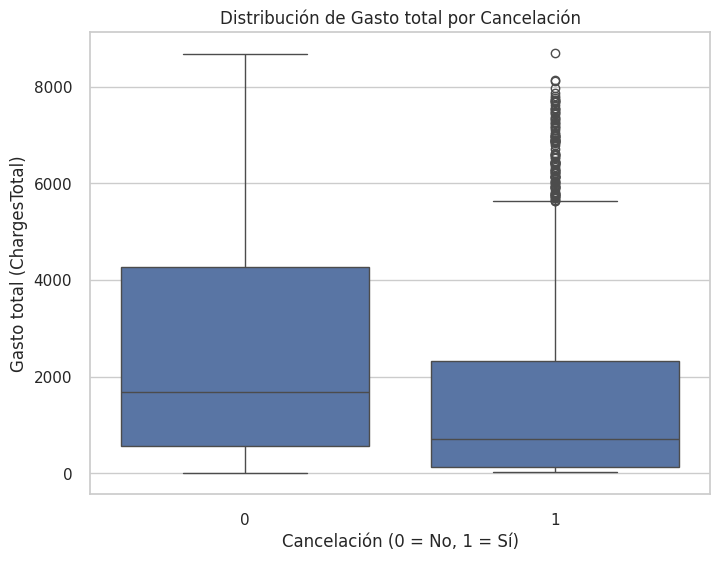

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de los gráficos
sns.set(style="whitegrid")
# Definir una paleta personalizada
custom_palette = {0: "lightblue", 1: "darkred"}

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='ChargesTotal', data=datos)
plt.title('Distribución de Gasto total por Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto total (ChargesTotal)')
plt.show()

## **Tiempo de contrato vs Gasto total**

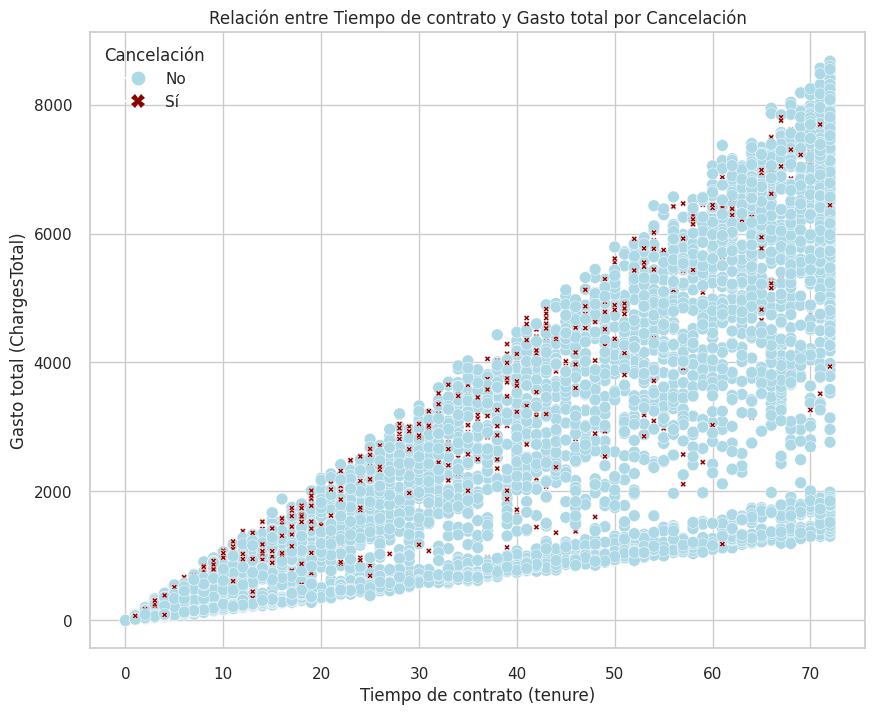

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tenure', y='ChargesTotal', hue='Churn', style='Churn', size='Churn',palette=custom_palette, data=datos)

# Personalizar la leyenda para asegurar que los colores y etiquetas sean correctos
plt.legend (title='Cancelación', labels=['No', 'Sí'],
 handles=[plt.Line2D([0], [0], marker='o', color='w',
 markerfacecolor='lightblue', markersize=10),
 plt.Line2D([0], [0], marker='X', color='w',
 markerfacecolor='darkred', markersize=10)])

plt.title('Relación entre Tiempo de contrato y Gasto total por Cancelación')
plt.xlabel('Tiempo de contrato (tenure)')
plt.ylabel('Gasto total (ChargesTotal)')
plt.show()

# **Tipos de modelos y su selección para el proyecto**

## **Diferencias entre modelos de Regresión y Clasificación**

**Modelos de Regresión**
*  **Objetivo**: Predecir valores numéricos continuos.
*   **Ejemplos**:
  *   Estimar el ingreso mensual de un cliente.
  *   Calcular la duración del contrato en meses.
  *   Proyectar las ventas futuras.
*   **Salida**: Un valor real (y ∈ ℝ).

**Modelos de Clasificación**
*   **Objetivo**: Asignar etiquetas o categorías a cada observación.
*   **Ejemplo**:
  *   Clasificar a un cliente como "cancelará" o "no cancelará".
*   **Salida**: Una clase (y ∈ {0,1} en casos binarios).
*   **Ventaja adicional**: La capacidad de entregar probabilidades asociadas a cada clase, lo que permite tomar decisiones más informadas (por ejemplo, en la segmentación de clientes en riesgo).

## **Selección del modelo**

En este análisis, se optó por modelos de clasificación en lugar de regresión, dado que el objetivo es predecir la cancelación (Churn: Sí/No). La naturaleza binaria del problema hace que los modelos de clasificación sean la opción más adecuada.

# **Ajustando modelos**

## **1.   Modelo de referencia**

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [26]:
from sklearn.dummy import DummyClassifier

In [27]:
modelo_dummy = DummyClassifier()
modelo_dummy.fit(X_train, y_train)
print(f'Exactitud del modelo en el conjunto de prueba: {modelo_dummy.score(X_test, y_test):.2%}')

Exactitud del modelo en el conjunto de prueba: 73.37%


## **2.   Árboles de decisión**

### **Decision Tree**

Usaremos `DecisionTreeClassifier` como modelo de classificación.Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de menor y mayor en los valores de las columnas de la base de datos. El índice GINI calcula qué tan mezcladas están las clases. Varía de 1 a 0, dónde 0 es perfectamente separado y, 1 -completamente mezclado.

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline as imbpipeline

In [29]:
modelo_arbol = DecisionTreeClassifier(max_depth=5)

# Crear pipeline
pipeline_arbol = imbpipeline(steps=[('oversample', SMOTE()), ('arbol', modelo_arbol)])
skf_arbol = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Validación cruzada
cv_resultados_arbol = cross_validate(pipeline_arbol, X_train, y_train, cv=skf_arbol, scoring='recall')
promedio_arbol = cv_resultados_arbol['test_score'].mean()
desvio_std_arbol = cv_resultados_arbol['test_score'].std()

# valor igual a 1 = 100% aprendizaje
print(f'Puntaje de recall en validación cruzada: {cv_resultados_arbol["test_score"]}')
print(f'Promedio recall: {promedio_arbol:.3f} (± {desvio_std_arbol:.3f})')
print(f'El intervalo de confianza aproximado: {promedio_arbol-2*desvio_std_arbol:.3f}, {min(promedio_arbol+2*desvio_std_arbol,1):.3f}')

Puntaje de recall en validación cruzada: [0.63909774 0.70411985 0.51503759 0.66917293 0.58646617]
Promedio recall: 0.623 (± 0.066)
El intervalo de confianza aproximado: 0.490, 0.755


In [30]:
print(nombres_columnas)

['MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'SeniorCitizen_Yes', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PhoneService_Si', 'tenure', 'PaperlessBilling', 'ChargesMonthly', 'ChargesTotal']


In [31]:
valores_columnas = ['Múltiples Líneas: No', 'Múltiples Líneas: Sin servicio telefónico', 'Múltiples Líneas: Sí'
                    , 'Servicio Internet: DSL', 'Servicio Internet: Fibra óptica', 'Servicio Internet: No'
                    , 'Adulto Mayor: Sí', 'Seguridad Online: No', 'Seguridad Online: Sin servicio internet'
                    , 'Seguridad Online: Sí', 'Online Backup: No', 'OnlineBackup: Sin servicio internet'
                    , 'Online Backup: Yes', 'Protección del equipo: No', 'Protección del equipo: Sin servicio internet'
                    , 'Protección del equipo: Sí', 'Soporte técnico: No', 'Soporte técnico: Sin servicio internet'
                    , 'Soporte técnico: Sí', 'StreamingTV: No', 'StreamingTV: Sin servicio internet'
                    , 'StreamingTV: Sí', 'StreamingMovies: No', 'StreamingMovies: Sin servicio internet'
                    , 'StreamingMovies: Sí', 'Contracto mes a mes', 'Contracto anular', 'Contracto por 2 años'
                    , 'Método de pago: Transferencia (automática)', 'Método de pago: TC (automática)'
                    , 'Método de pago: Cheque electrónico', 'Método de pago: Cheque por correo'
                    , 'Servicio telefónico: Sí', 'Permanencia', 'Facturación electrónica'
                    , 'Cargos Mensuales', 'Total de Cargos']



In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

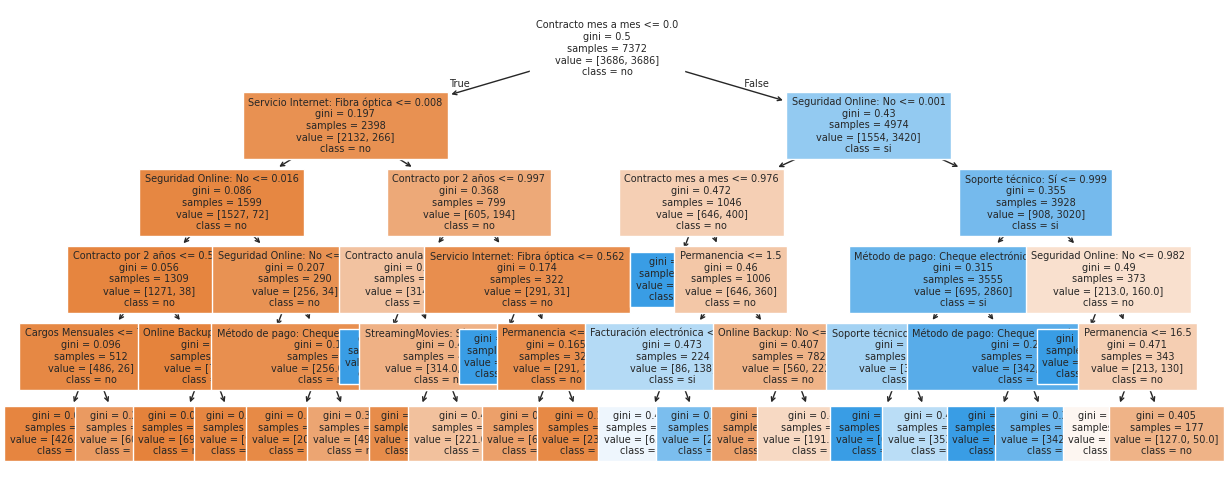

In [33]:
# Entrenar en todo el set de entrenamiento
pipeline_arbol.fit(X_train, y_train)

# Extraer el árbol entrenado desde el pipeline
modelo_arbol_entrenado = pipeline_arbol.named_steps['arbol']

plt.figure(figsize=(15,6))
plot_tree(modelo_arbol_entrenado, feature_names=valores_columnas, filled=True
          , class_names=['no', 'si'], fontsize=7)
plt.show()

### Probando el modelo Decision Tree

Al entrenar un modelo con la variable desbalanceada, puede ser que el patrón de los datos para la clase dominante sobresalga en relación a la clase con menor frecuencia, generando un modelo con un desempeño muy bajo para clasificar la clase de menor frecuencia.

Usaremos la estrategia de oversampling que consiste en aumentar la cantidad de datos de la clase que tiene menor frecuencia hasta que tenga la misma cantidad que la clase de mayor frecuencia. De esta manera, el modelo prestará más atención al patrón de los datos de la clase que tenía menor frecuencia al principio y podrá diferenciar mejor las dos clases.

In [34]:
from sklearn.metrics import classification_report
# para presentar graficamente la matriz de confución
from sklearn.metrics import ConfusionMatrixDisplay


=== Evaluación en conjunto de validación del modelo Decision Tree ===
              precision    recall  f1-score   support

          no       0.87      0.78      0.82      1229
          si       0.53      0.67      0.59       444

    accuracy                           0.75      1673
   macro avg       0.70      0.73      0.71      1673
weighted avg       0.78      0.75      0.76      1673



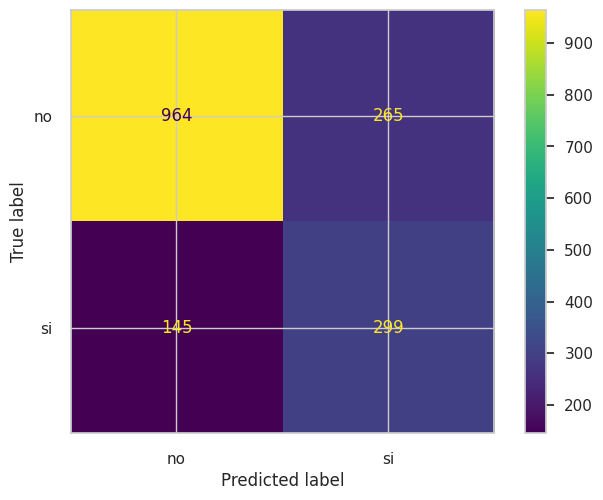

In [35]:
# Evaluación en conjunto de validación (X_val, y_val)
y_arbol_previsto = pipeline_arbol.predict(X_val)

print("\n=== Evaluación en conjunto de validación del modelo Decision Tree ===")
print(classification_report(y_val, y_arbol_previsto, target_names=['no', 'si']))
# en el eje Y van los valores reales y (1 -evadido, 0 -permanece) en el eje X los valores previstos
ConfusionMatrixDisplay.from_predictions(y_val, y_arbol_previsto, display_labels=['no','si']);

### **Random Forest**

Utilizaremos el algoritmo `Random Forest` para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y comparar los resultados con el resultado del árbol de decisión.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate

In [37]:
# Modelo base
modelo_forest = RandomForestClassifier(
    n_estimators=200,  # cantidad de árboles
    max_depth=5,       # profundidad máxima
    random_state=5,
    n_jobs=-1,         # usar todos los núcleos disponibles
    class_weight="balanced"
)

# Crear pipeline
pipeline_forest = imbpipeline(steps=[
      ('oversample', SMOTE(random_state=5)),
    #, ('feature_selection', SelectFromModel(modelo_forest, threshold="median"))  # Selección automática
      ('forest', modelo_forest)
])

# Validación cruzada
skf_forest = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_forest = cross_validate(
    pipeline_forest, X_train, y_train,
    cv=skf_forest, scoring='recall'
)

promedio_forest = cv_resultados_forest['test_score'].mean()
desvio_std_forest = cv_resultados_forest['test_score'].std()

# valor igual a 1 = 100% aprendizaje
print(f'Puntaje de recall en validación cruzada: {cv_resultados_forest["test_score"]}')
print(f'Promedio recall: {promedio_forest:.3f} (± {desvio_std_forest:.3f})')
print(f'El intervalo de confianza aproximado: {promedio_forest-2*desvio_std_forest:.3f}, {min(promedio_forest+2*desvio_std_forest,1):.3f}')

Puntaje de recall en validación cruzada: [0.73684211 0.73033708 0.69924812 0.70300752 0.67293233]
Promedio recall: 0.708 (± 0.023)
El intervalo de confianza aproximado: 0.662, 0.755


### **Probando el modelo Random Forest**

In [38]:
# para presentar graficamente la matriz de confución
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
)


=== Evaluación en conjunto de validación del modelo Random Forest ===
[[950 279]
 [124 320]]
              precision    recall  f1-score   support

          no       0.88      0.77      0.83      1229
          si       0.53      0.72      0.61       444

    accuracy                           0.76      1673
   macro avg       0.71      0.75      0.72      1673
weighted avg       0.79      0.76      0.77      1673



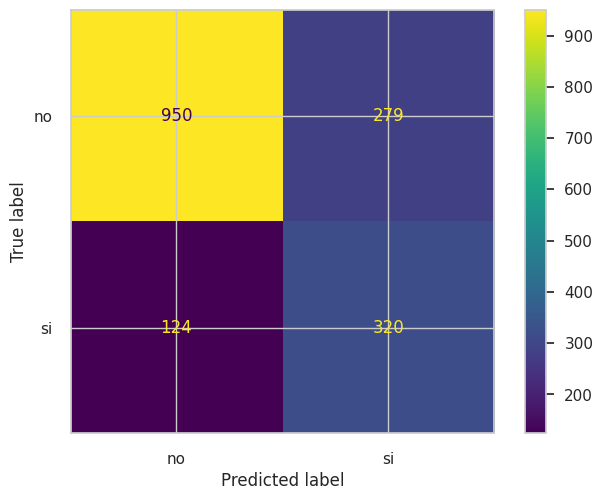

In [39]:
# Entrenar en todo el set de entrenamiento
pipeline_forest.fit(X_train, y_train)

# Evaluación en conjunto de validación
y_forest_previsto = pipeline_forest.predict(X_val)

print("\n=== Evaluación en conjunto de validación del modelo Random Forest ===")
print(confusion_matrix(y_val, y_forest_previsto))
print(classification_report(y_val, y_forest_previsto, target_names=['no', 'si']))

ConfusionMatrixDisplay.from_predictions(y_val, y_forest_previsto, display_labels=['no','si'])
plt.show()

## **3.   Modelos basados en distancia**

Modelos basados en distancia, como **KNN**, **SVM**, **Regresión Logística** y **Redes Neuronales**, requieren realizar una transformación en los datos. Por otro lado, modelos basados en árboles, como **Decision Tree**, **Random Forest** y **XGBoost**, no son sensibles a la escala de los datos.

### **KNN (k-Nearest Neighbors)**

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [40]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Definir modelo
modelo_knn = KNeighborsClassifier()

# Crear pipeline con normalización incluida
pipeline_knn = imbpipeline(steps=[
    ('oversample', SMOTE(random_state=5)),
    ('normalizacion', MinMaxScaler()),
    ('knn', modelo_knn)
])

# Validación cruzada
skf_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_knn = cross_validate(pipeline_knn, X_train, y_train, cv=skf_knn, scoring='recall')

# Resultados
promedio_knn = cv_resultados_knn['test_score'].mean()
desvio_std_knn = cv_resultados_knn['test_score'].std()

# valor igual a 1 = 100% aprendizaje
print(f'Puntaje de recall en validación cruzada: {cv_resultados_knn["test_score"]}')
print(f'Promedio recall: {promedio_forest:.3f} (± {desvio_std_knn:.3f})')
print(f'El intervalo de confianza aproximado: {promedio_knn-2*desvio_std_knn:.3f}, {min(promedio_knn+2*desvio_std_knn,1):.3f}')

Puntaje de recall en validación cruzada: [0.67669173 0.70786517 0.66917293 0.71052632 0.68045113]
Promedio recall: 0.708 (± 0.017)
El intervalo de confianza aproximado: 0.655, 0.723


### **Probando el modelo KNN**

In [42]:
from sklearn.metrics import classification_report
# para presentar graficamente la matriz de confución
from sklearn.metrics import ConfusionMatrixDisplay


=== Evaluación en conjunto de validación del modelo KNN ===
              precision    recall  f1-score   support

          no       0.86      0.72      0.78      1229
          si       0.46      0.66      0.54       444

    accuracy                           0.70      1673
   macro avg       0.66      0.69      0.66      1673
weighted avg       0.75      0.70      0.72      1673



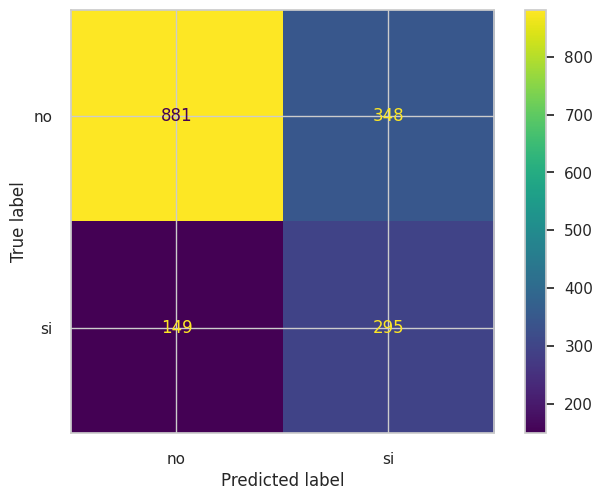

In [43]:
# Entrenar en todo el set de entrenamiento
pipeline_knn.fit(X_train, y_train)

# Evaluación en conjunto de validación (X_val, y_val)
y_knn_previsto = pipeline_knn.predict(X_val)

print("\n=== Evaluación en conjunto de validación del modelo KNN ===")
print(classification_report(y_val, y_knn_previsto, target_names=['no', 'si']))
# en el eje Y van los valores reales y (1 -evadido, 0 -permanece) en el eje X los valores previstos
ConfusionMatrixDisplay.from_predictions(y_val, y_knn_previsto, display_labels=['no','si']);

# **Informes de métricas**

In [44]:
from sklearn.metrics import (
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)

In [45]:
# Probabilidades predichas
y_proba_arbol = pipeline_arbol.predict_proba(X_val)[:,1]
y_proba_forest = pipeline_forest.predict_proba(X_val)[:,1]
y_proba_knn = pipeline_knn.predict_proba(X_val)[:,1]

## **Curva ROC**

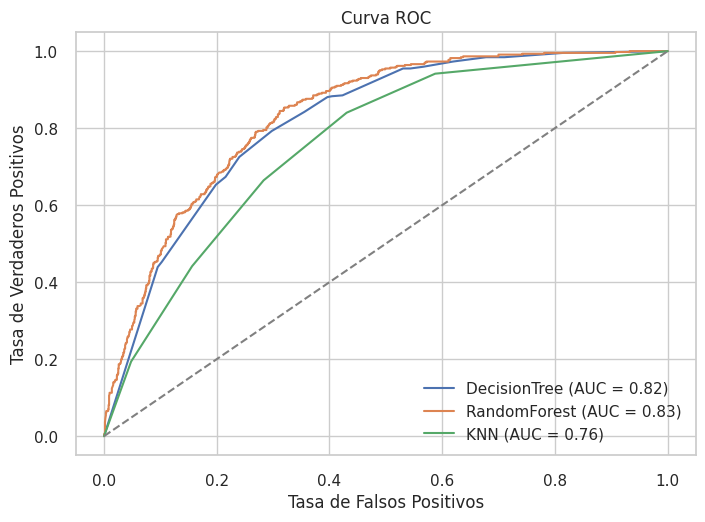

In [46]:
fpr_arbol, tpr_arbol, _ = roc_curve(y_val, y_proba_arbol)
roc_auc_arbol = roc_auc_score(y_val, y_proba_arbol)

fpr_forest, tpr_forest, _forest = roc_curve(y_val, y_proba_forest)
roc_auc_forest = roc_auc_score(y_val, y_proba_forest)

fpr_knn, tpr_knn, _knn = roc_curve(y_val, y_proba_knn)
roc_auc_knn = roc_auc_score(y_val, y_proba_knn)

plt.plot(fpr_arbol, tpr_arbol, label=f'DecisionTree (AUC = {roc_auc_arbol:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'RandomForest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## **Curva Precision-Recall**

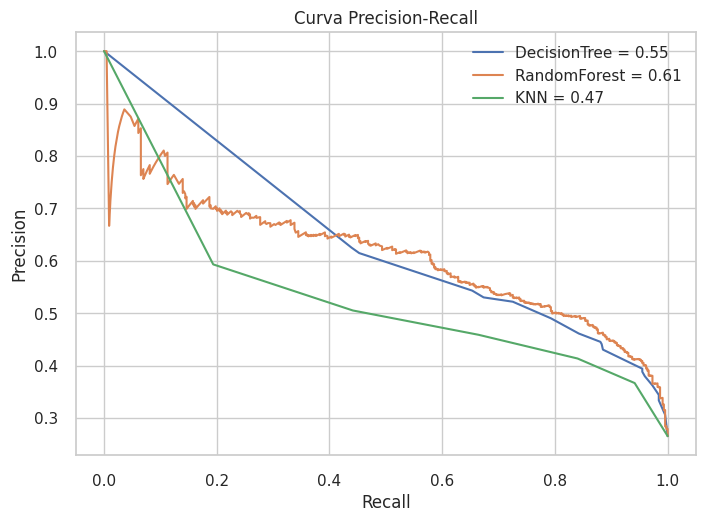

In [47]:
prec_arbol, rec_arbol, _arbol = precision_recall_curve(y_val, y_proba_arbol)
ap_arbol = average_precision_score(y_val, y_proba_arbol)

prec_forest, rec_forest, _forest = precision_recall_curve(y_val, y_proba_forest)
ap_forest = average_precision_score(y_val, y_proba_forest)

prec_knn, rec_knn, _knn = precision_recall_curve(y_val, y_proba_knn)
ap_knn = average_precision_score(y_val, y_proba_knn)

plt.plot(rec_arbol, prec_arbol, label=f'DecisionTree = {ap_arbol:.2f}')
plt.plot(rec_forest, prec_forest, label=f'RandomForest = {ap_forest:.2f}')
plt.plot(rec_knn, prec_knn, label=f'KNN = {ap_knn:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend()
plt.show()

## **Comparación de curvas ROC entre modelos**

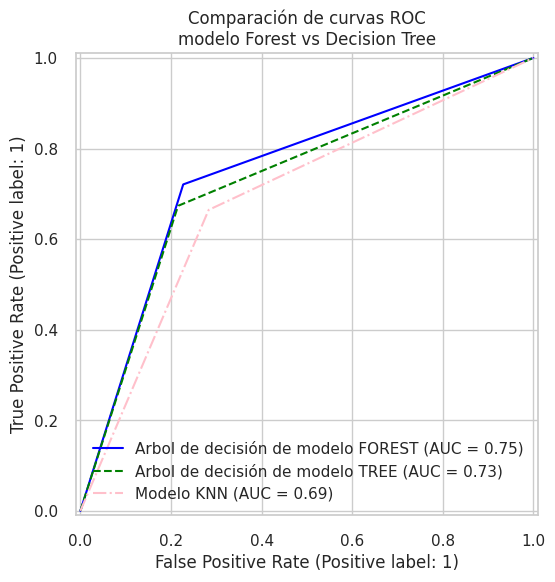

In [48]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar cada curva ROC
RocCurveDisplay.from_predictions(y_val, y_forest_previsto
                                 , ax=ax, color='blue'
                                 , name='Arbol de decisión de modelo FOREST')
RocCurveDisplay.from_predictions(y_val, y_arbol_previsto
                                 , ax=ax, linestyle='--', color='green'
                                 , name='Arbol de decisión de modelo TREE')#, ax = curva_roc.ax_)
RocCurveDisplay.from_predictions(y_val, y_knn_previsto
                                 , ax=ax, linestyle='-.', color='pink'
                                 , name='Modelo KNN') #, ax = curva_roc.ax_)

# Títulos
ax.set_title("Comparación de curvas ROC\nmodelo Forest vs Decision Tree")
plt.show()

# **Feature importances (atributos más importantes del modelo)**

Vamos a evaluar cuales son y cuantas columnas necesitamos para entrenar el modelo, segun como estas afectan a las metricas.

In [49]:
importances = modelo_forest.feature_importances_

In [50]:
feature_importances = pd.DataFrame({"Features": X.columns, "Importances": (importances*100).round(2)}).sort_values("Importances", ascending=False)
feature_importances

,Features,Importances
25,Contract_Month-to-month,19.67
30,PaymentMethod_Electronic check,11.17
16,TechSupport_No,10.74
7,OnlineSecurity_No,8.83
33,tenure,6.50
10,OnlineBackup_No,6.05
27,Contract_Two year,4.68
9,OnlineSecurity_Yes,4.15
18,TechSupport_Yes,3.64
13,DeviceProtection_No,3.04


In [51]:
selected_features = feature_importances['Features'].values[:15]
X_selected_features = X[selected_features]

X_selected_features

,Contract_Month-to-month,PaymentMethod_Electronic check,TechSupport_No,OnlineSecurity_No,tenure,OnlineBackup_No,Contract_Two year,OnlineSecurity_Yes,TechSupport_Yes,DeviceProtection_No,Contract_One year,ChargesTotal,PaperlessBilling,InternetService_Fiber optic,OnlineBackup_Yes
1448,0.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,263.65,1.0,0.0,0.0
343,0.0,0.0,0.0,0.0,57.0,0.0,1.0,0.0,0.0,0.0,0.0,1087.70,1.0,0.0,0.0
3500,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1010.00,0.0,0.0,1.0
2932,0.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,2511.95,1.0,0.0,1.0
67,0.0,1.0,0.0,0.0,49.0,1.0,0.0,1.0,1.0,0.0,1.0,4059.35,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,0.0,0.0,0.0,0.0,35.0,0.0,1.0,1.0,1.0,0.0,0.0,3914.05,1.0,1.0,1.0
2936,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,1.0,1295.40,1.0,0.0,0.0
2846,1.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,141.70,0.0,0.0,0.0
6661,0.0,0.0,1.0,0.0,70.0,0.0,1.0,1.0,0.0,0.0,0.0,5600.15,1.0,0.0,1.0


In [52]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_selected_features, y, random_state=5)

In [53]:
param_grid = {
    'forest__max_depth': [5, 10, 15],
    'forest__n_estimators': [100, 200, 300],
    'forest__class_weight': [None, 'balanced']
}

In [55]:
from sklearn.model_selection import GridSearchCV

# Modelo base
modelo = RandomForestClassifier(
    random_state=5,
    n_jobs=-1,         # usar todos los núcleos disponibles
)

# Crear pipeline
pipeline = imbpipeline(steps=[
      ('oversample', SMOTE(random_state=5)),
      ('forest', modelo)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
model_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)
model_grid.fit(X_train_grid, y_train_grid)

print("Mejores parámetros:", model_grid.best_params_)
print("Mejor recall en CV:", model_grid.best_score_)

Mejores parámetros: {'forest__class_weight': None, 'forest__max_depth': 5, 'forest__n_estimators': 200}
Mejor recall en CV: 0.7003745318352059


In [56]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report

def calcular_metricas(y_test, y_pred):
    # Calcular métricas
    metricas = {
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }

    # Imprimir reporte de clasificación detallado
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Sí']))

    return metricas

In [58]:
y_pred_grid = model_grid.predict(X_test_grid)
metricas_model_grid = calcular_metricas(y_test_grid, y_pred_grid)
print('Métricas del modelo grid:', metricas_model_grid)

Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.88      0.80      0.84      1233
          Sí       0.55      0.70      0.61       440

    accuracy                           0.77      1673
   macro avg       0.72      0.75      0.73      1673
weighted avg       0.79      0.77      0.78      1673

Métricas del modelo grid: {'recall': 0.6954545454545454, 'precision': 0.5503597122302158, 'f1_score': 0.6144578313253012, 'accuracy': 0.7704722056186492}


# **Escogiendo y serializando el mejor modelo**

### **Evaluamos la tasa de acierto de los modelos**

In [59]:
lista_modelos = [
    ('dummy', modelo_dummy, X_test),
    ('arbol', modelo_arbol, X_test),
    ('random forest', modelo_forest, X_test),
    ('knn', pipeline_knn, X_test)
]

In [60]:
for nombre, modelo, X in lista_modelos:
    print(f'La exactidud del modelo {nombre} es: {modelo.score(X, y_test)}')

La exactidud del modelo dummy es: 0.7337110481586402
La exactidud del modelo arbol es: 0.7450424929178471
La exactidud del modelo random forest es: 0.7620396600566572
La exactidud del modelo knn es: 0.7110481586402266


## **Serializando los modelos**

In [61]:
# almacena el modelo con mejor precisión en un archivo
import joblib

In [62]:
# exportar el modelo entrenado a un archivo
joblib.dump(modelo_forest, 'modelo_churn_forest_II.pkl')
joblib.dump(modelo_arbol, 'modelo_churn_arbol_champion.pkl')
joblib.dump(modelo_knn, 'modelo_churn_knn_IV.pkl')
joblib.dump(modelo_dummy, 'modelo_churn_dummy_III.pkl')

['modelo_churn_dummy_III.pkl']

# **Conclusión**

## Modelos de Clasificación evaluados

Probé diferentes algoritmos para evaluar su desempeño en la predicción de cancelaciones de clientes:

Dummy Classifier: lo usé como modelo base para tener un punto de comparación.

Árbol de decisión: resulta sencillo de interpretar y ayuda a identificar reglas claras.

Random Forest: al ser un modelo de ensamble, mejora la estabilidad y el rendimiento frente a un solo árbol.

KNN (K-Nearest Neighbors): necesita normalización de datos y se basa en medir similitudes entre clientes.

La métrica principal que consideré fue el recall, porque lo más importante es detectar la mayor cantidad posible de clientes que podrían cancelar, reduciendo al mínimo los falsos negativos.

## Comparación de modelos

Los resultados muestran lo siguiente:

Random Forest fue el que mejor balance logró entre precisión y recall. Gracias a su capacidad de ensamble, captura relaciones más complejas y reduce el riesgo de sobreajuste. Es el modelo que mejor predice la cancelación de clientes.

El Árbol de Decisión sirvió para entender qué factores influyen en la cancelación, aunque tuvo menos estabilidad y un recall inferior al de Random Forest.

El KNN, a pesar de la normalización, no dio el rendimiento esperado, probablemente por la dispersión y dimensionalidad de los datos.

El Dummy Classifier solo confirma que los demás modelos superan por mucho una predicción aleatoria.

En conclusión, el Random Forest fue el más destacado, con un AUC de 0.83 y un Average Precision (AP) de 0.61, lo que refleja un buen desempeño para identificar clientes en riesgo de cancelar.


## Análisis de curvas

### Curva Precision-Recall

La precisión promedio fue de 0.61, lo que quiere decir que, de los clientes clasificados como en riesgo de cancelar, el 61% realmente termina cancelando.

La curva muestra una tendencia decreciente: mientras más clientes se intentan capturar (mayor recall), la precisión va bajando.

Esto refleja el trade-off clásico: hay que encontrar un equilibrio entre detectar la mayor cantidad de cancelaciones posibles (recall) y reducir los falsos positivos.

### Curva ROC

- El **AUC de 0.83** confirma que el modelo distingue bien entre clientes que cancelan y los que no.
- La curva está muy por encima de la diagonal aleatoria, lo que valida el buen rendimiento del Random Forest.

---

## Principales factores que influyen en la cancelación

Con base en las variables analizadas y los resultados del modelo, los factores que más influyen en la cancelación de clientes son:

Duración del contrato: los contratos de corto plazo están más asociados con cancelaciones.

Uso de servicios adicionales: los clientes que no contratan extras como internet, TV o paquetes premium tienen mayor probabilidad de darse de baja.

Nivel de facturación mensual: cuentas con montos de cobro más altos presentan un riesgo mayor de cancelación.

Experiencia del cliente: un alto número de reclamos o llamadas está directamente relacionado con el churn.

Forma de pago: quienes usan métodos menos automáticos (por ejemplo, cheque electrónico) muestran mayor tendencia a cancelar.

## Estrategias de retención

Con los resultados obtenidos, las principales recomendaciones son:

Fomentar contratos a largo plazo ofreciendo descuentos o beneficios por comprometerse a una permanencia mínima.

Impulsar los servicios adicionales mediante paquetes personalizados que aumenten la satisfacción y el nivel de fidelidad del cliente.

Ajustar la política de precios con promociones segmentadas, sobre todo para clientes con alta facturación y mayor riesgo de cancelar.

Fortalecer la atención al cliente con programas de fidelización y tiempos de respuesta más rápidos a los reclamos.

Promover pagos automáticos, motivando a los clientes a migrar a débito automático o tarjetas para mayor comodidad.